# Random Forest

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

In [4]:
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = data[["sepal length", "sepal width", "petal length", "petal width"]]
y = data["species"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
from sklearn import metrics

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

**Making a prediciton for a single sample**

In [14]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

**Looking at feature importances**

In [15]:
clf.feature_importances_

array([0.11302997, 0.0313533 , 0.45884943, 0.39676729])

In [18]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

petal length    0.458849
petal width     0.396767
sepal length    0.113030
sepal width     0.031353
dtype: float64

In [19]:
from matplotlib import pyplot
import seaborn as sns

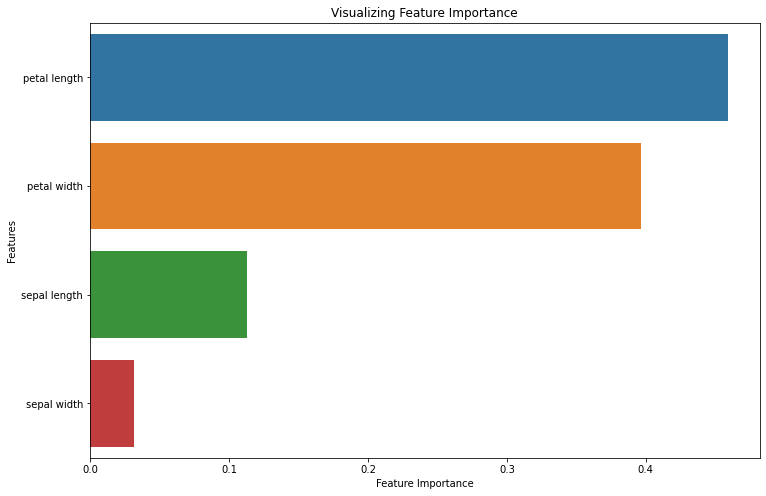

In [27]:
fig = pyplot.figure(figsize=(12,8))

sns.barplot(x=feature_importance.values, y=feature_importance.index)

pyplot.title("Visualizing Feature Importance")
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Features")

pyplot.show()

### removing sepal width cause of how low importance

In [28]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X = data[["sepal length", "petal length", "petal width"]]
y = data["species"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.8, random_state=24)

In [31]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [33]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

petal width     0.433280
petal length    0.365135
sepal length    0.201584
dtype: float64

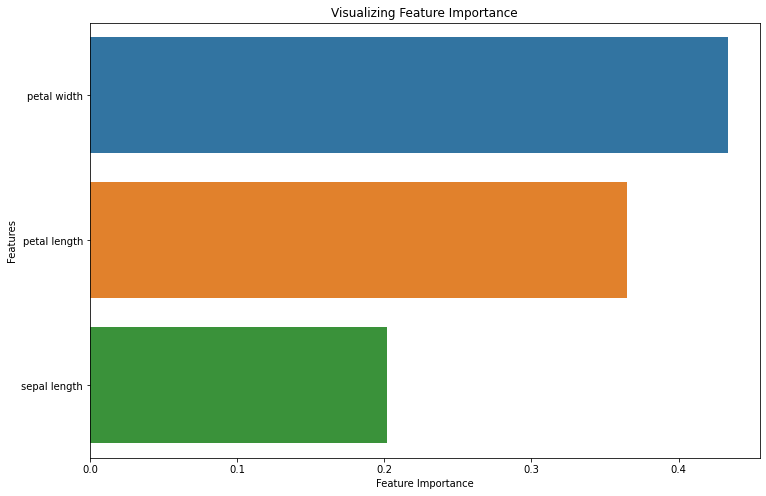

In [34]:
fig = pyplot.figure(figsize=(12,8))

sns.barplot(x=feature_importance.values, y=feature_importance.index)

pyplot.title("Visualizing Feature Importance")
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Features")

pyplot.show()

Reducing the irrelevant feature reduced the noise and therefore increased the accuracy score of the model